In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#https://www.kaggle.com/code/faressayah/cifar-10-images-classification-using-cnns-88

# load in dataset
(train_images, train_labels) , (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# create a validation set from the training data (80-20 split)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# normalize pixel values to be between 0 and 1, by dividing by 255
# since RGB values range from [0, 255]
train_images, val_images, test_images = train_images / 255.0, val_images / 255.0, test_images / 255.0

print('Training data shape: ', train_images.shape)
print('Validation data shape: ', val_images.shape)
print('Test data shape: ', test_images.shape)

Training data shape:  (40000, 32, 32, 3)
Validation data shape:  (10000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


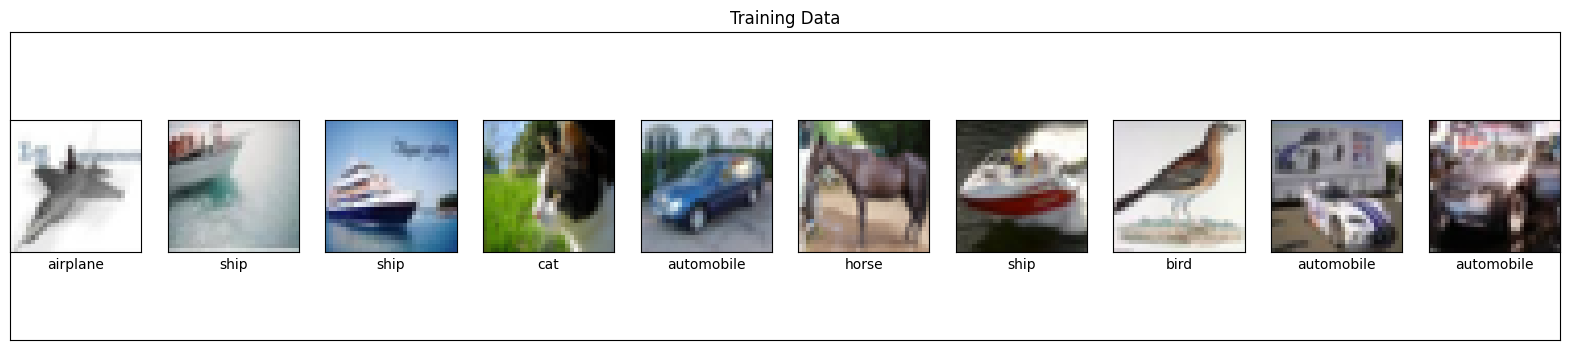

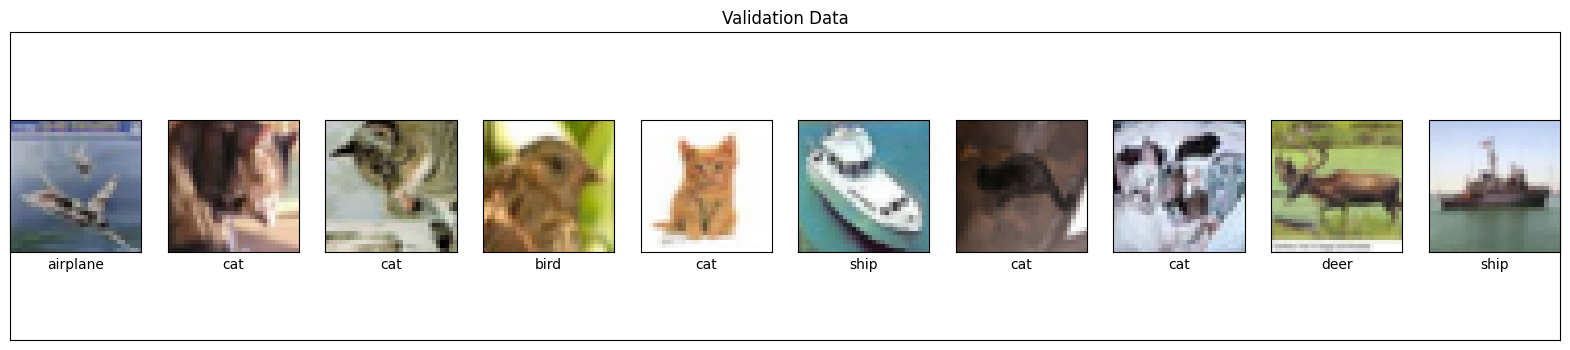

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# utility to display a row of digits with their predictions
def display_images(digits, predictions, labels, title):

  n = 10

  indexes = np.random.choice(len(predictions), size=n)
  n_digits = digits[indexes]
  n_predictions = predictions[indexes]
  n_predictions = n_predictions.reshape((n,))
  n_labels = labels[indexes]

  fig = plt.figure(figsize=(20, 4))
  plt.title(title)
  plt.yticks([])
  plt.xticks([])

  for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    class_index = n_predictions[i]

    plt.xlabel(classes[class_index])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(n_digits[i])


display_images(train_images, train_labels, train_labels, "Training Data" )
display_images(val_images, val_labels, val_labels, "Validation Data")

In [5]:
# create the simple CNN model

# block 1
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

#block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

#block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10)) # 10 classes in CIFAR-10

model.summary()
# the 'param #' col in the table is telling us how many parameters there are to tune
# NOT INCLUDING hyper parameters

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 488,074 (1.86 MB)

 Trainable params: 487,434 (1.86 MB)

 Non-trainable params: 640 (2.50 KB)

In [6]:
# choose optimizer and learning rate
optimizer = SGD(learning_rate=0.02)

model.compile(optimizer=optimizer,
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

# fit the model based on training and validation data
history = model.fit(train_images, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_images, val_labels)
                  )

# test the model using separate test data
loss, accuracy = model.evaluate(test_images, test_labels, batch_size=32)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4261 - loss: 1.6614 - val_accuracy: 0.5379 - val_loss: 1.3155
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6409 - loss: 1.0180 - val_accuracy: 0.5900 - val_loss: 1.1653
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7220 - loss: 0.7983 - val_accuracy: 0.6410 - val_loss: 1.0567
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7669 - loss: 0.6649 - val_accuracy: 0.6872 - val_loss: 0.9233
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8124 - loss: 0.5390 - val_accuracy: 0.6704 - val_loss: 1.0042
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8544 - loss: 0.4271 - val_accuracy: 0.6589 - val_loss: 1.1432
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8877 - loss: 0.3335 - val_accuracy: 0.6720 - val_loss: 1.1028
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9197 - loss: 0.2452 

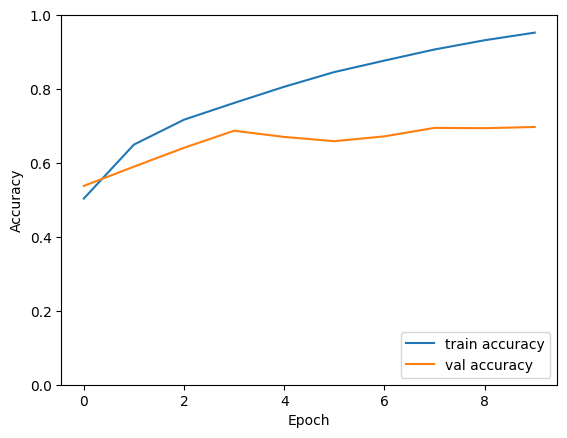

In [7]:
# accuracy graph
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

The model seems to be overfitting since the validation accuracy is much lower than training accuracy, but there is also the possibility that 10 epochs was not enough time for the model to properly learn. This number of epochs was chosen to directly compare with the ResNet50 model which is achieving almost perfect accuracy in just 10 epochs due to the use of pre-trained weights.

In [8]:
# make predictions on the test data
y_pred = model.predict(test_images)

y_pred = np.argmax(y_pred, axis=1)
y_true = test_labels.flatten()

# compute performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Performance Metrics:
Accuracy: 0.6972
Precision: 0.7105
Recall: 0.6972
F1 Score: 0.7003


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


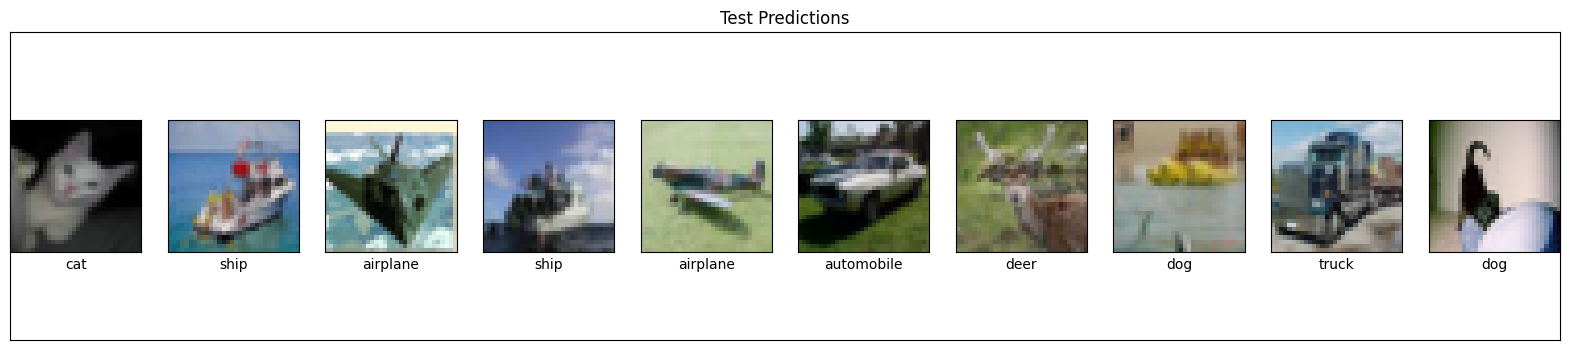

In [10]:
# show some samples of predicted labels
predictions = model.predict(test_images, batch_size=64)
predictions = np.argmax(predictions, axis = 1)

display_images(test_images, predictions, test_labels, "Test Predictions")